## Test the recovery of curved-sky power spectra with Gaussian mocks

In [2]:
import numpy as np
import os
import sys
import matplotlib.pyplot as plt
import matplotlib
from matplotlib import cm
from astropy.io import fits
from astropy.table import Table, vstack
import healpy as hp
from pixell import enmap
import pymaster as nmt
import copy

# to use matplotlib with jupiter
import matplotlib as mpl
mpl.rc('text', usetex=False)
mpl.rc('font', family='serif')
%matplotlib inline

In [3]:
defaultcolor = "#4682b4"
d = np.linspace(0, 1, 5)

### Read in the theoretical power spectra:

In [4]:
pathTheoryCl = '/global/cscratch1/sd/sferraro/SOxpipe/input_cl/'

ells_theory = cls_arr = np.genfromtxt(pathTheoryCl + 'cl_kk.txt', usecols={0})

cl_kk = np.genfromtxt(pathTheoryCl + 'cl_kk.txt', usecols={1})
ncl_kk = np.genfromtxt(pathTheoryCl + 'ncl_kk.txt', usecols={1})

### Define parameters to run the mock survey

Define the basic parameters needed to run the mock survey

In [11]:
nrealis = 32

In [12]:
l0_bins = np.array([213.0373, 291.0176, 397.5417, 543.0580, 741.8391, 1013.3821, 1384.3207, 1891.0378])
lf_bins = np.array([291.0176, 397.5417, 543.0580, 741.8391, 1013.3821, 1384.3207, 1891.0378, 2583.2338])

In [14]:
path2data = '/global/cscratch1/sd/sferraro/SOxpipe/input_cl/sims_grf/k_footmask/'

path2mockcls = os.path.join(path2data, 'cls_signal-noise-removed_nrealis={}.npy'.format(nrealis))
path2mocknoisecls = os.path.join(path2data, 'cls_noise_nrealis={}.npy'.format(nrealis))
path2ells = os.path.join(path2data, 'ells_uncoupled_nrealis={}.npy'.format(nrealis))

print('Read = {}.'.format(path2mockcls))
cls = np.load(path2mockcls)
noisecls = np.load(path2mocknoisecls)
ells_data = np.load(path2ells)

Read = /global/cscratch1/sd/sferraro/SOxpipe/input_cl/sims_grf/k_footmask/cls_signal-noise-removed_nrealis=32.npy.


We need to include the Anderson Hartlap correction to calculate the $\chi^{2}$:

In [15]:
AHcorr = (nrealis-lf_bins.shape[0]-2.)/(nrealis-1)

### Reconstruction of the CMB kappa power spectrum

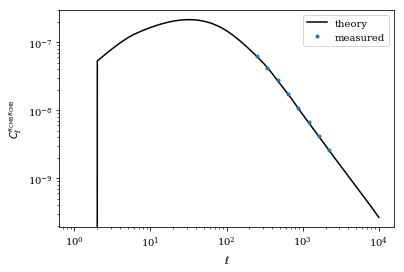

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_kk, color='k', label=r'theory')
ax.plot(ells_data, np.mean(cls[0,0,:,:], axis=0), '.', label=r'measured')
ax.legend()
# ax.set_xlim([200, 4100])
# ax.set_ylim([1e-8, 1e-5])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

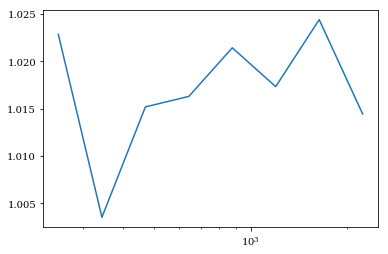

In [20]:
from scipy.interpolate import interp1d

f = interp1d(ells_theory, cl_kk, kind='linear')



plt.semilogx(ells_data, np.mean(cls[0,0,:,:], axis=0) / f(ells_data))
plt.show()

IndexError: index 1 is out of bounds for axis 0 with size 1

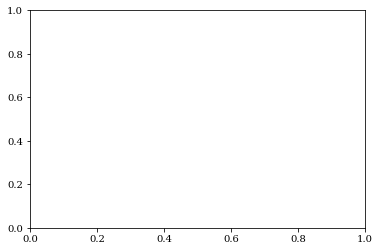

In [17]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, np.mean(noisecls[1,1,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
# ax.set_xlim([2, 1200])
# ax.set_ylim([0, 1000])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [24]:
cmbkappacov = np.cov(cls[1,1,:,:].T)/nrealis
cmbkappaerr = np.sqrt(np.diag(cmbkappacov))

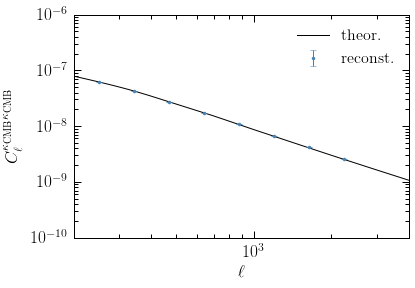

In [25]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_kk, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, np.mean(cls[1,1,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
# ax.plot(ells, ells*(ells+1)*np.mean(cls[0,0,:,:], axis=0)*(10**6)**2/(2.*np.pi), \
#         color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [26]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=1_probe2=1.dat'))
cl_kk_binned = w.decouple_cell(w.couple_cell([cl_kk[:w.wsp.lmax+1]]))[0]

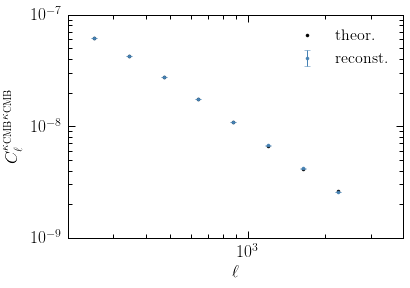

In [36]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_kk_binned, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, np.mean(cls[1,1,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

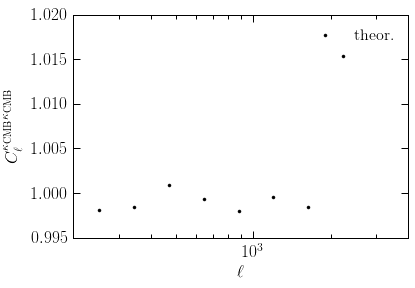

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_kk_binned/np.mean(cls[1,1,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\kappa_{\mathrm{CMB}}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

### Galaxy overdensity power spectrum

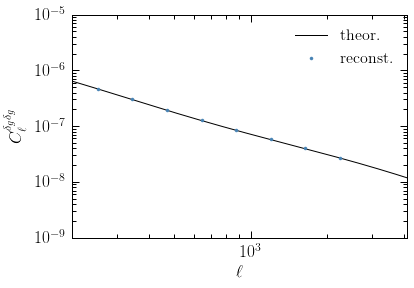

In [9]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_gg, \
        color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, np.mean(cls[0,0,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4100])
# ax.set_ylim([1e-8, 1e-5])
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

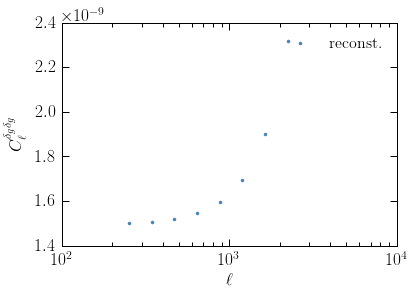

In [10]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, np.mean(noisecls[0,0,:,:], axis=0), \
        color=defaultcolor, label=r'$\mathrm{reconst.}$', linestyle='None', marker='.')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
# ax.set_xlim([2, 1200])
# ax.set_ylim([0, 1000])
ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [11]:
deltagcov = np.cov(cls[0,0,:,:].T)/nrealis
deltagerr = np.sqrt(np.diag(deltagcov))

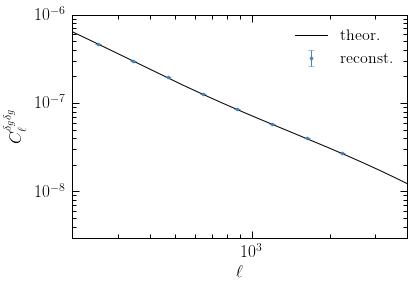

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, cl_gg, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, np.mean(cls[0,0,:,:], axis=0), \
            yerr=deltagerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
# ax.plot(ells, ells*(ells+1)*np.mean(cls[0,0,:,:], axis=0)*(10**6)**2/(2.*np.pi), \
#         color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

In [16]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=0_probe2=0.dat'))
cl_gg_binned = w.decouple_cell(w.couple_cell([cl_gg[:w.wsp.lmax+1]]))[0]

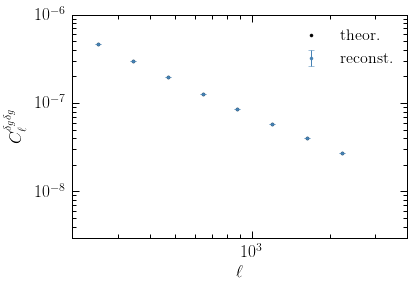

In [18]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gg_binned, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, np.mean(cls[0,0,:,:], axis=0), \
            yerr=deltagerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

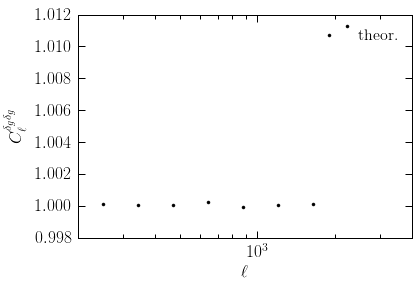

In [21]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gg_binned/np.mean(cls[0,0,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\delta_{g}\delta_{g}}_{\ell}$')
plt.show()

### Reconstruction of the cosmic shear power spectrum

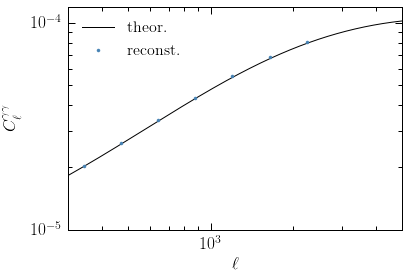

In [29]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*(ells_theory+1)*cl_ss/2./np.pi, \
        color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*(ells_data+1)*np.mean(cls[2,2,:,:], axis=0)/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 5000])
ax.set_ylim(1e-5, 1.2e-4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [30]:
gammaecov = np.cov(cls[2,2,:,:].T)/nrealis
gammaeerr = np.sqrt(np.diag(gammaecov))
gammabcov = np.cov(cls[3,3,:,:].T)/nrealis
gammaberr = np.sqrt(np.diag(gammabcov))
gammaebcov = np.cov(cls[3,2,:,:].T)/nrealis
gammaeberr = np.sqrt(np.diag(gammaebcov))

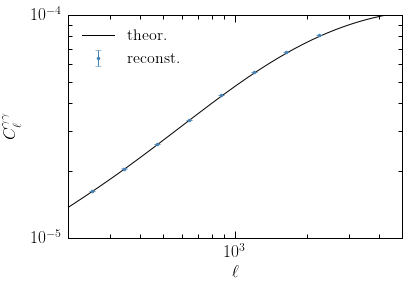

In [31]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*(ells_theory+1)*cl_ss/2./np.pi, \
        color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[2,2,:,:], axis=0)/2./np.pi, \
            yerr=ells_data*(ells_data+1)*gammaeerr/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 5000])
ax.set_ylim(1e-5, 1e-4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

In [35]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=2_probe2=2.dat'))
cl_ss_binned = w.decouple_cell(w.couple_cell([cl_ss[:w.wsp.lmax+1], np.zeros_like(cl_ss[:w.wsp.lmax+1]), \
                            np.zeros_like(cl_ss[:w.wsp.lmax+1]), np.zeros_like(cl_ss[:w.wsp.lmax+1])]))[0]

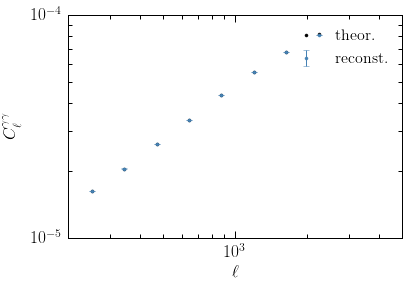

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, ells_data*(ells_data+1)*cl_ss_binned/2./np.pi, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[2,2,:,:], axis=0)/2./np.pi, \
            yerr=ells_data*(ells_data+1)*gammaeerr/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 5000])
ax.set_ylim(1e-5, 1e-4)
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

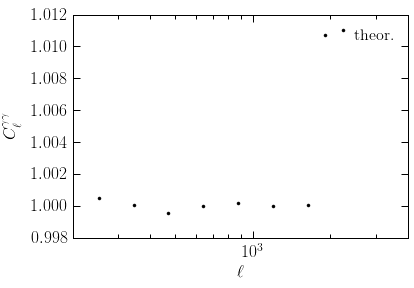

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_ss_binned/np.mean(cls[2,2,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\gamma \gamma}_{\ell}$')
plt.show()

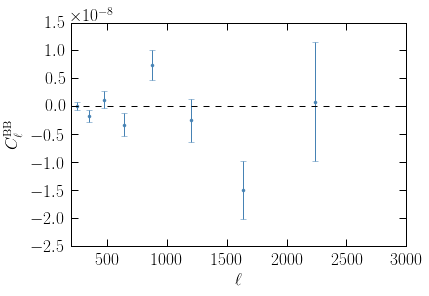

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[3,3,:,:], axis=0)/2./np.pi, \
                yerr=ells_data*(ells_data+1)*gammaberr/2./np.pi, \
            color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
# leg = ax.legend(loc='upper left',prop={'size':16})
# leg.draw_frame(False) 
ax.set_xlim([200, 3000])
# ax.set_ylim(1e-5, 1e-4)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\mathrm{BB}}_{\ell}$')
plt.show()

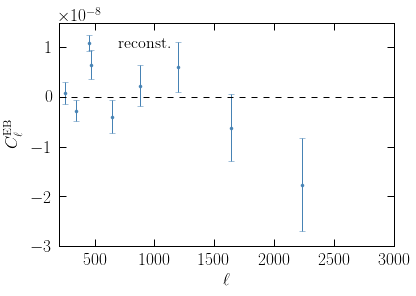

In [33]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*(ells_data+1)*np.mean(cls[3,2,:,:], axis=0)/2./np.pi, \
            yerr=ells_data*(ells_data+1)*gammaeberr/2./np.pi, \
        color=defaultcolor, linestyle='None', marker='.', label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper left',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 3000])
# ax.set_ylim(1e-5, 1e-4)
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$C^{\mathrm{EB}}_{\ell}$')
plt.show()

### Reconstruction of the galaxy density and CMB kappa power spectrum

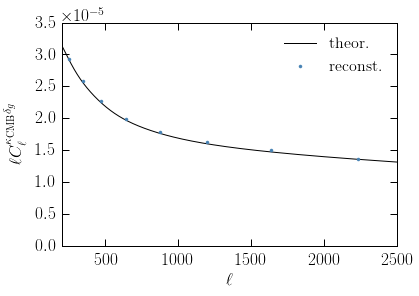

In [40]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gk, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[1,0,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

In [41]:
cmbkappaxdeltagcov = np.cov(cls[1,0,:,:].T)/nrealis
cmbkappaxdeltagerr = np.sqrt(np.diag(cmbkappaxdeltagcov))

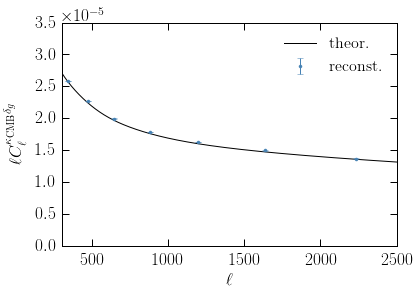

In [42]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gk, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[1,0,:,:], axis=0), \
            yerr=ells_data*cmbkappaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

In [43]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=1_probe2=0.dat'))
cl_gk_binned = w.decouple_cell(w.couple_cell([cl_gk[:w.wsp.lmax+1]]))[0]

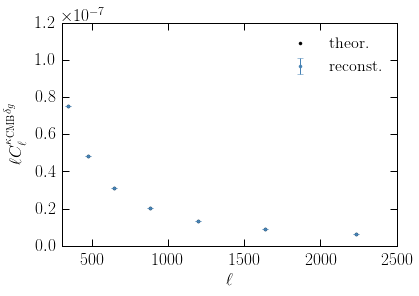

In [44]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gk_binned, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, np.mean(cls[1,0,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

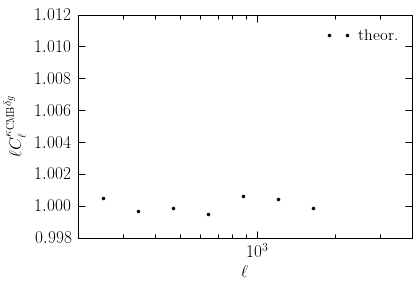

In [45]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gk_binned/np.mean(cls[1,0,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\kappa_{\mathrm{CMB}}\delta_{g}}_{\ell}$')
plt.show()

### Reconstruction of the weak lensing and CMB kappa power spectrum

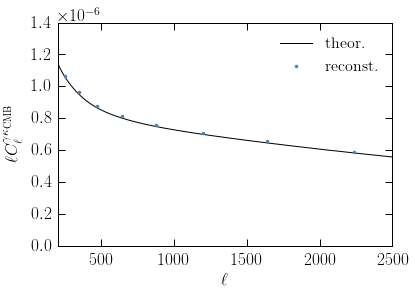

In [46]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_ks, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[2,1,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [47]:
gammaxcmbkappacov = np.cov(cls[2,1,:,:].T)/nrealis
gammaxcmbkappaerr = np.sqrt(np.diag(gammaxcmbkappacov))

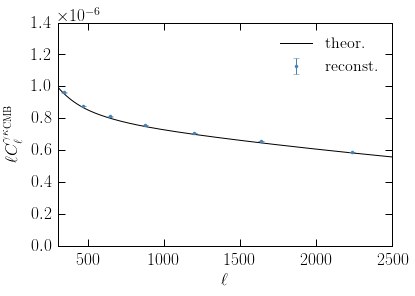

In [48]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_ks, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[2,1,:,:], axis=0), \
            yerr=ells_data*gammaxcmbkappaerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

In [52]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=2_probe2=1.dat'))
cl_ks_binned = w.decouple_cell(w.couple_cell([cl_ks[:w.wsp.lmax+1], np.zeros_like(cl_gk[:w.wsp.lmax+1])]))[0]

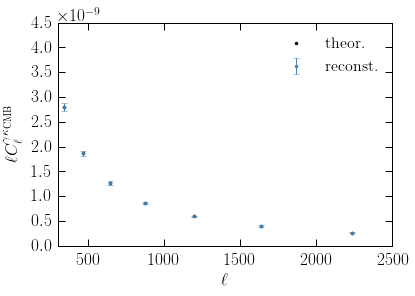

In [53]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_ks_binned, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, np.mean(cls[2,1,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

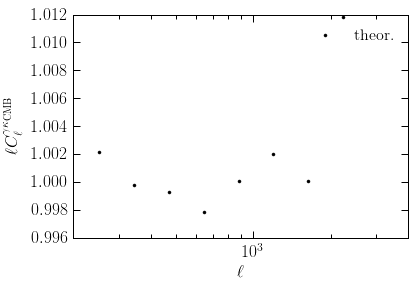

In [54]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_ks_binned/np.mean(cls[2,1,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

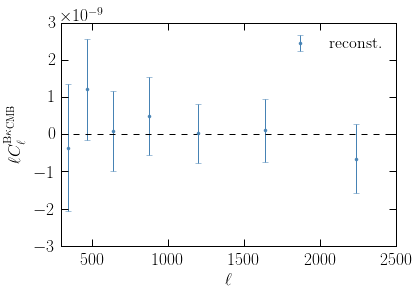

In [28]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*np.mean(cls[3,1,:,:], axis=0), \
            yerr=ells_data*gammaxcmbkappaerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\mathrm{B}\kappa_{\mathrm{CMB}}}_{\ell}$')
plt.show()

### Reconstruction of the galaxy density and galaxy lensing power spectrum

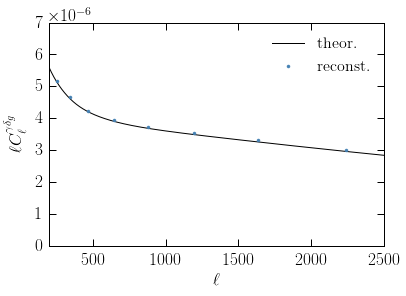

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gs, color='k', label=r'$\mathrm{theor.}$')
ax.plot(ells_data, ells_data*np.mean(cls[2,0,:,:], axis=0), \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

Compute the covariance matrix of the reconstructed realisations:

In [56]:
gammaxdeltagcov = np.cov(cls[2,0,:,:].T)/nrealis
gammaxdeltagerr = np.sqrt(np.diag(gammaxdeltagcov))

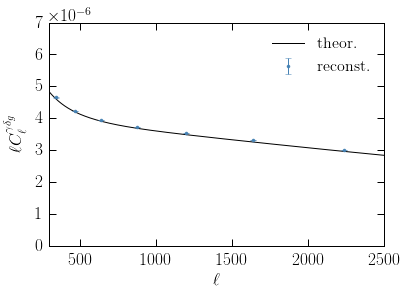

In [57]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_theory, ells_theory*cl_gs, color='k', label=r'$\mathrm{theor.}$')
ax.errorbar(ells_data, ells_data*np.mean(cls[2,0,:,:], axis=0), \
            yerr=ells_data*gammaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

In [58]:
w = nmt.NmtWorkspace()
w.read_from(os.path.join(path2data, 'wsp_probe1=2_probe2=0.dat'))
cl_gs_binned = w.decouple_cell(w.couple_cell([cl_gs[:w.wsp.lmax+1], np.zeros_like(cl_gs[:w.wsp.lmax+1])]))[0]

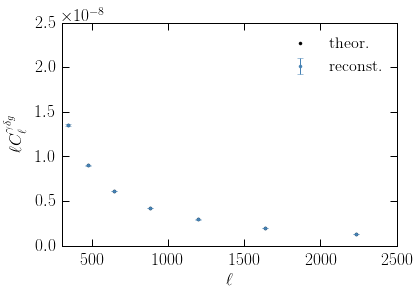

In [59]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gs_binned, color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
ax.errorbar(ells_data, np.mean(cls[2,0,:,:], axis=0), \
            yerr=cmbkappaerr, color=defaultcolor, \
            label=r'$\mathrm{reconst.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

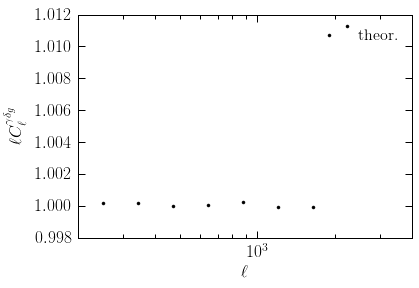

In [60]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ells_data, cl_gs_binned/np.mean(cls[2,0,:,:], axis=0), color='k', label=r'$\mathrm{theor.}$', marker='.', linestyle='None')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([200, 4000])
# ax.set_ylim(3e-9, 1e-6)
ax.set_xscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\gamma\delta_{g}}_{\ell}$')
plt.show()

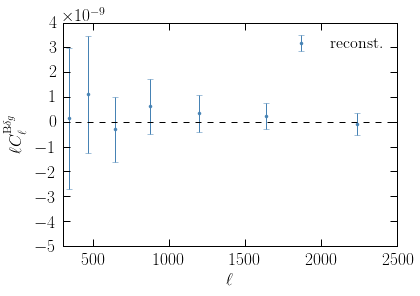

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.axhline(y=0, linestyle='--', color='k')
ax.errorbar(ells_data, ells_data*np.mean(cls[3,0,:,:], axis=0), \
            yerr=ells_data*gammaxdeltagerr, \
        linestyle='None', marker='.', color=defaultcolor, label=r'$\mathrm{reconst.}$')
leg = ax.legend(loc='upper right',prop={'size':16})
leg.draw_frame(False) 
ax.set_xlim([300, 2500])
# ax.set_ylim([-1e-9, 4e-9])
# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$\ell$')
ax.set_ylabel(r'$\ell C^{\mathrm{B}\delta_{g}}_{\ell}$')
plt.show()